In [1]:
import os
import pandas as pd
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
os.chdir('C:\\Users\\Vipul k Dhiman\\Desktop')
os.getcwd()

'C:\\Users\\Vipul k Dhiman\\Desktop'

In [3]:
train = pd.read_csv('Motor_Temp.csv')

In [4]:
train.head()

,Unnamed: 0,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,1,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,3,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
2,4,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
3,5,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
4,6,-0.762936,-1.116955,0.334901,-1.303017,-1.222429,-0.248197,1.031031,-0.246341,-2.522203,-1.831931,-2.062549,-2.017884,4


In [5]:
# Missing Value Check
train.isnull().sum()

Unnamed: 0        0
ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [6]:
#Remove Duplicates
train = DataFrame.drop_duplicates(train)

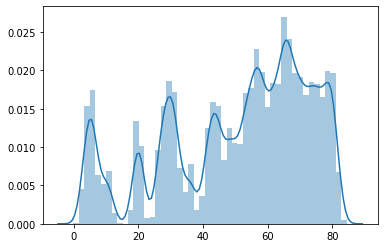

In [7]:
# Exploratory Data Analysis
x = np.random.normal(train["profile_id"])
sns.distplot(x)

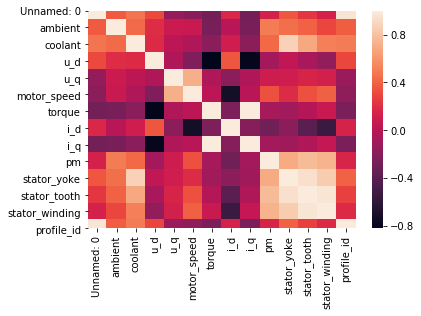

In [8]:
# Correlation Chart
sns.heatmap(train.corr())

In [9]:
# Outlier detection and correction
for column in train:
    if((train[column].dtypes != 'object') & (column != 'profile_id')):
         U_B = train[column].quantile(0.98)
         L_B = train[column].quantile(0.02)
         train[column] = np.where(train[column]>U_B, U_B, train[column])
         train[column] = np.where(train[column]<L_B, L_B, train[column])


In [10]:
from sklearn.model_selection import train_test_split
Train_X, Test_X, Train_Y, Test_Y = train_test_split(train.drop('pm', axis = 1), train["pm"], test_size = 0.25, random_state = 123)

In [11]:
Train_X.shape

(523986, 13)

In [12]:
# VIF Check
from statsmodels.stats.outliers_influence import variance_inflation_factor
cols_to_drop_vif = []

for i in range(Train_X.shape[1]-1):
    temp_vif = variance_inflation_factor(Train_X.values, i)
    print(Train_X.columns[i],": ", temp_vif)
    if temp_vif>10:
        print('Since the value of VIF is greater than 10 so dropping this Column', Train_X.columns[i])
        cols_to_drop_vif.append(Train_X.columns[i])
        
Train_X = Train_X.drop(cols_to_drop_vif, axis = 1)
Test_X = Test_X.drop(cols_to_drop_vif, axis = 1)

Unnamed: 0 :  51.218989863561866
Since the value of VIF is greater than 10 so dropping this Column Unnamed: 0
ambient :  1.4427875752041255
coolant :  39.93401770651446
Since the value of VIF is greater than 10 so dropping this Column coolant
u_d :  5.85627590607636
u_q :  5.339886177638281
motor_speed :  14.118953386884693
Since the value of VIF is greater than 10 so dropping this Column motor_speed
torque :  270.6917839378671
Since the value of VIF is greater than 10 so dropping this Column torque
i_d :  9.137879781970465
i_q :  234.40916245897878
Since the value of VIF is greater than 10 so dropping this Column i_q
stator_yoke :  370.6611457952025
Since the value of VIF is greater than 10 so dropping this Column stator_yoke
stator_tooth :  576.1606237659807
Since the value of VIF is greater than 10 so dropping this Column stator_tooth
stator_winding :  141.6497468844968
Since the value of VIF is greater than 10 so dropping this Column stator_winding


In [13]:
# Model Building
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(Train_X,Train_Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
coeff_data = pd.DataFrame(lm.coef_,Train_X.columns,columns=['Coefficient'])
coeff_data

,Coefficient
ambient,0.507414
u_d,-0.087676
u_q,0.012992
i_d,-0.268864
profile_id,0.001484


In [15]:
# print the intercept
print(lm.intercept_)

-0.0745654956558228


In [16]:
predictions = lm.predict(Test_X)

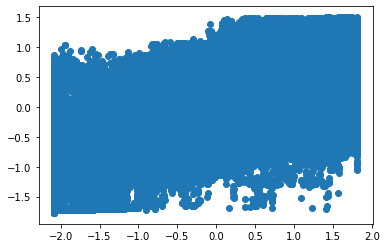

In [17]:
plt.scatter(Test_Y,predictions)

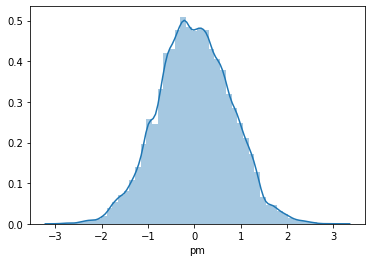

In [18]:
# Residual plot
sns.distplot((Test_Y-predictions),bins=50)

In [19]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(Test_Y, predictions))
print('MSE:', metrics.mean_squared_error(Test_Y, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(Test_Y, predictions)))

MAE: 0.6289283802682966
MSE: 0.6146688117809846
RMSE: 0.7840081707361121
